![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Awari/br-classification-project-master/Churn_Modelling.csv',index_col='RowNumber')

In [17]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [19]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


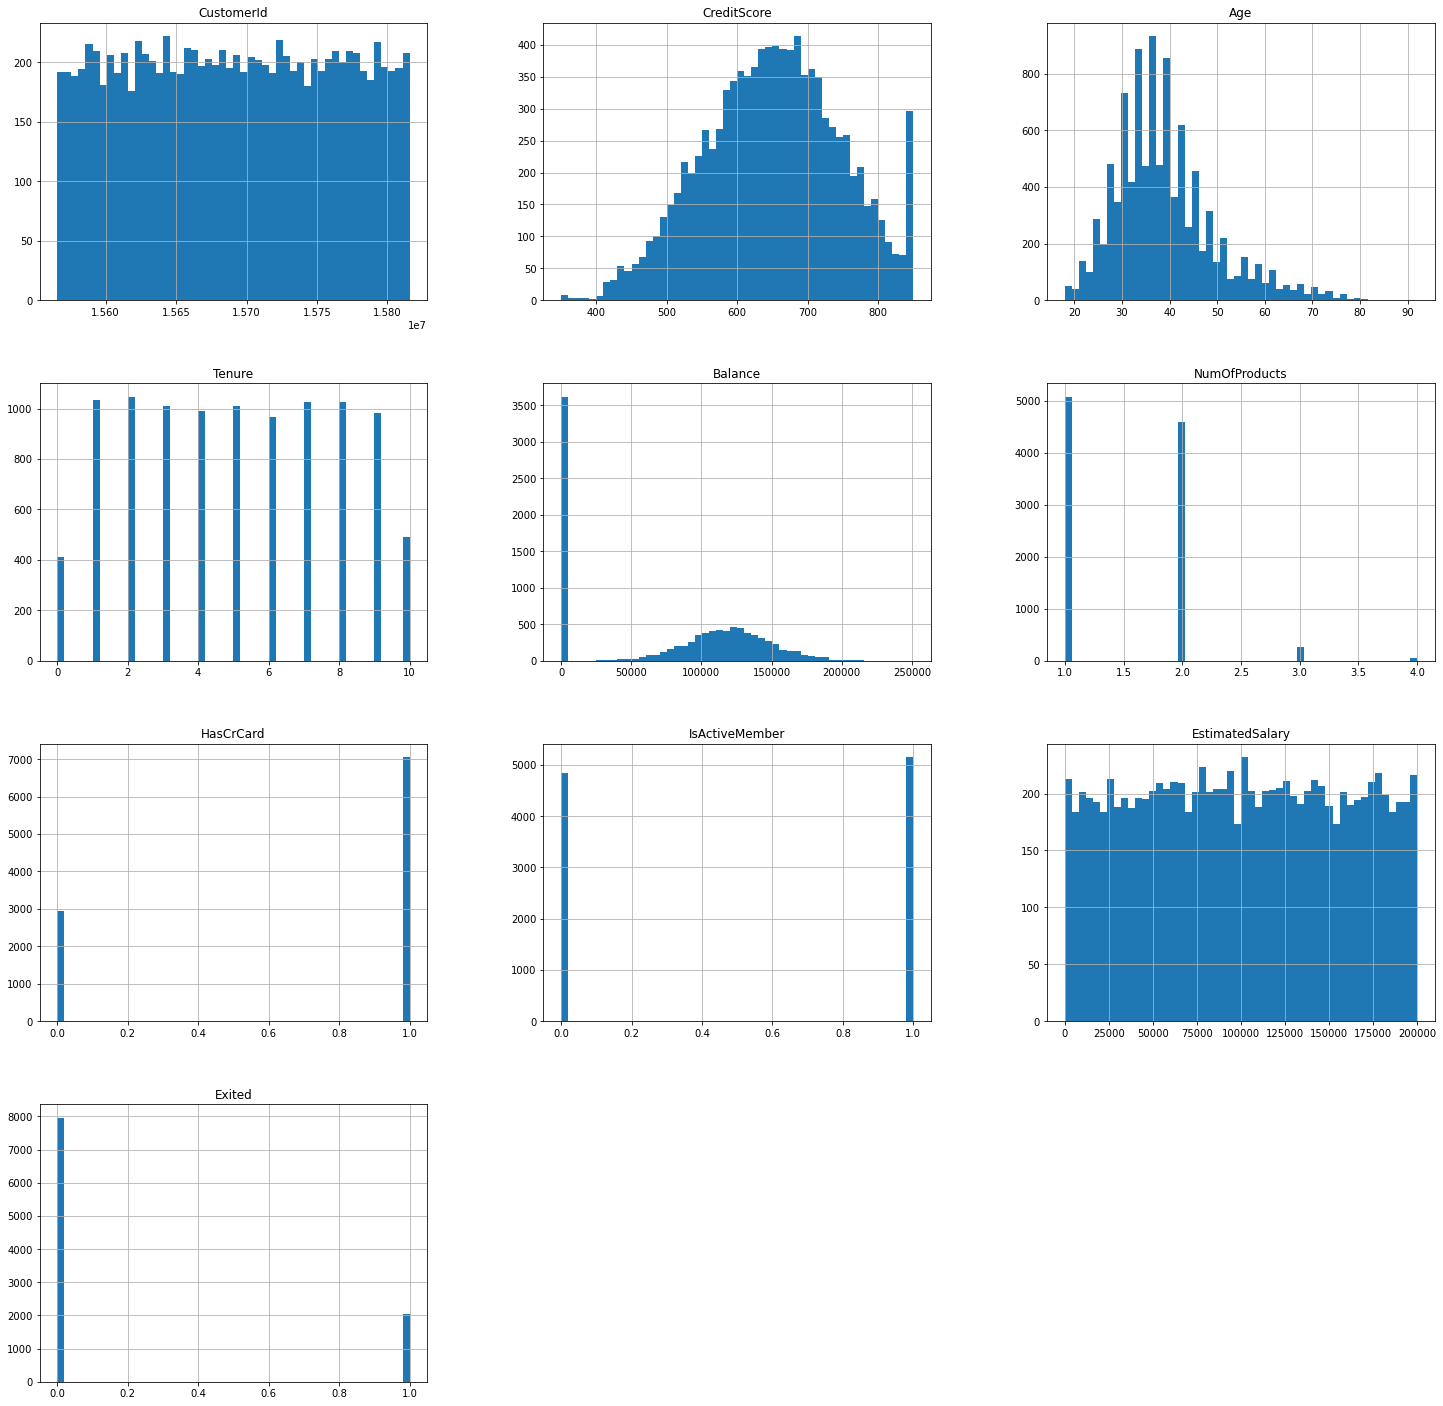

In [20]:
df.hist(bins=50,figsize=(25, 25))
plt.show()

In [21]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### 3.2 Preparação e limpeza dos dados

In [22]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

df_prep = df.copy()
encoder_b = LabelBinarizer()
encoder_e = LabelEncoder()
df_prep['Gender'] = encoder_b.fit_transform(df_prep['Gender'])
df_prep['Surname'] = encoder_e.fit_transform(df_prep['Surname'])
df_prep['Geography'] = encoder_e.fit_transform(df_prep['Geography'])
df_prep = df_prep.drop(['CustomerId'],axis=1)
df_prep.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
from sklearn.model_selection import train_test_split

df_prep_X = df_prep.drop('Exited',axis=1)
df_prep_y = df_prep['Exited']

df_prep_X_train, df_prep_X_test, df_prep_y_train, df_prep_y_test = train_test_split(df_prep_X, df_prep_y, test_size=0.2,stratify=df_prep_y)

### 3.3 Seleção de atributos

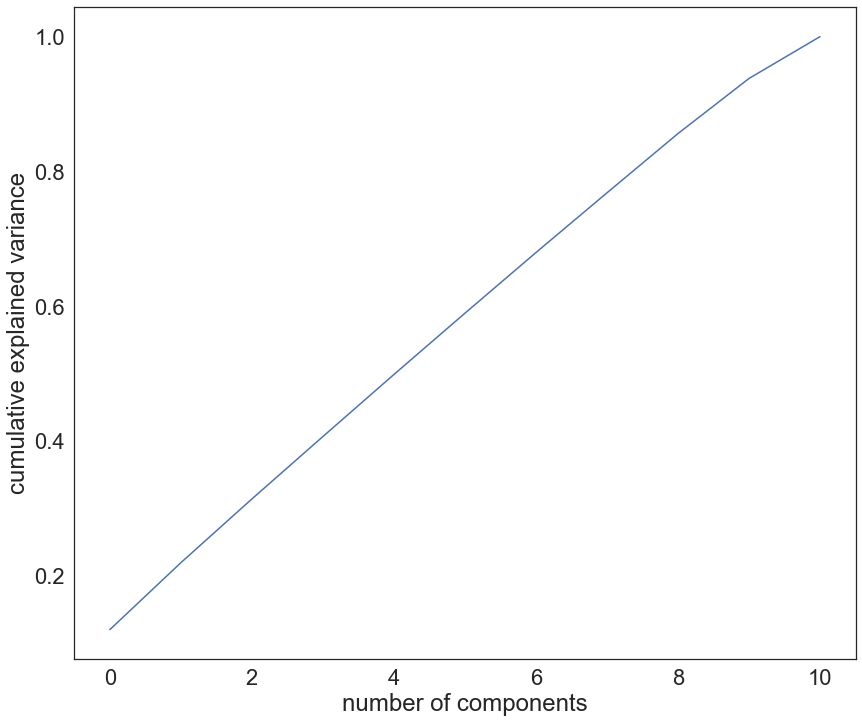

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_prep_X_train_sc = scaler.fit_transform(df_prep_X_train)
pca = PCA()
pca.fit(df_prep_X_train_sc)
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [52]:
pca = PCA(0.75)
pca.fit(df_prep_X_train_sc)
len(pca.explained_variance_ratio_)

8

### 3.4 Construção do modelo

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

scaler = StandardScaler()
model = XGBClassifier(use_label_encoder=False)
pca = PCA(0.75)


steps=[('scaler',scaler),('pca',pca),('model',model)]
pipe = Pipeline(steps=steps)

### 3.5 Avaliação do modelo

In [54]:
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_train = pipe.predict(df_prep_X_train)

[15:26:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

print('Acurácia: %f'% accuracy_score(df_prep_y_train,df_prep_ypred_train))
print('F1-score: %f'% f1_score(df_prep_y_train,df_prep_ypred_train))
print('F2-score: %f'% fbeta_score(df_prep_y_train,df_prep_ypred_train,beta=2))

Acurácia: 0.950250
F1-score: 0.862379
F2-score: 0.801208


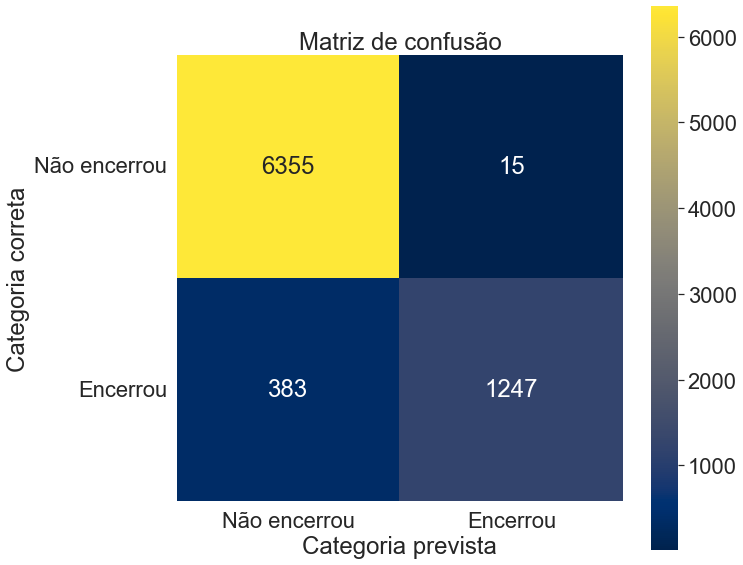

In [56]:
from sklearn.metrics import confusion_matrix

categories = ['Não encerrou','Encerrou']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_train,df_prep_ypred_train),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

sns.set_theme(style='white',font_scale=2)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Matriz de confusão")
ax.set_xlabel("Categoria prevista")
ax.set_ylabel("Categoria correta")
plt.show()

### 3.4 Otimização do modelo

In [58]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

scaler = StandardScaler()
pca = PCA(0.75)
df_prep_X_train_sc = scaler.fit_transform(df_prep_X_train)
df_prep_X_train_sc_pca = pca.fit_transform(df_prep_X_train_sc)

model = XGBClassifier(use_label_encoder=False,random_state=12345,tree_method='hist')

n_estimators = [100,300,500]
learning_rate = [0.01, 0.1, 0.3]
colsample_bytree = [0.5,0.7,1]
min_child_weight = [1,3,5]
subsample = [0.5,0.7,1]

grid = dict(n_estimators=n_estimators,
            learning_rate=learning_rate,
            colsample_bytree=colsample_bytree,
            min_child_weight = min_child_weight,
            subsample=subsample
           )

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

f2_score = make_scorer(f2_measure)

# define grid search
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=12345)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=f2_score)
grid_result = grid_search.fit(df_prep_X_train_sc_pca,df_prep_y_train)

[15:55:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
# summarize results
means_f2 = grid_result.cv_results_['mean_test_score']
stds_f2 = grid_result.cv_results_['std_test_score']
params_f2 = grid_result.cv_results_['params']

'''for mean_f2, stdev_f2,param in zip(means_f2, stds_f2, params):
    print("%f (%f) with: %r" % (mean_f2, stdev_f2, param))'''
    
print('\nMaior F2:\n')
for i in np.where(means_f2==means_f2.max())[0]:
    print("F2: %f (%f) with: %r" % (means_f2[i], stds_f2[i], params_f2[i]))


Maior F2:

F2: 0.328030 (0.017134) with: {'colsample_bytree': 1, 'learning_rate': 0.3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}


In [62]:
scaler = StandardScaler()
pca = PCA(0.75)
model = XGBClassifier(use_label_encoder=False,random_state=12345,
                      n_estimators=300,
                      learning_rate=0.3,
                      colsample_bytree=1,
                      min_child_weight = 5,
                      subsample=0.7)

steps=[('scaler',scaler),('pca',pca),('model',model)]
pipe = Pipeline(steps=steps)

pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_train = pipe.predict(df_prep_X_train)

print('Acurácia: %f'% accuracy_score(df_prep_y_train,df_prep_ypred_train))
print('F1-score: %f'% f1_score(df_prep_y_train,df_prep_ypred_train))
print('F2-score: %f'% fbeta_score(df_prep_y_train,df_prep_ypred_train,beta=2))

[15:58:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 0.998750
F1-score: 0.996923
F2-score: 0.995086


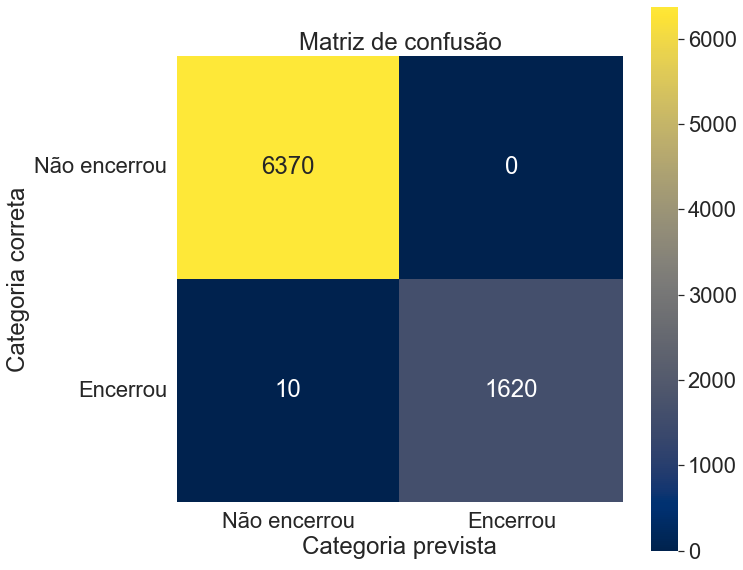

In [65]:
categories = ['Não encerrou','Encerrou']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_train,df_prep_ypred_train),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

sns.set_theme(style='white',font_scale=2)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Matriz de confusão")
ax.set_xlabel("Categoria prevista")
ax.set_ylabel("Categoria correta")
plt.show()

In [66]:
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_test = pipe.predict(df_prep_X_test)

print('Acurácia: %f'% accuracy_score(df_prep_y_test,df_prep_ypred_test))
print('F1-score: %f'% f1_score(df_prep_y_test,df_prep_ypred_test))
print('F2-score: %f'% fbeta_score(df_prep_y_test,df_prep_ypred_test,beta=2))

[15:59:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 0.777500
F1-score: 0.320611
F2-score: 0.279851


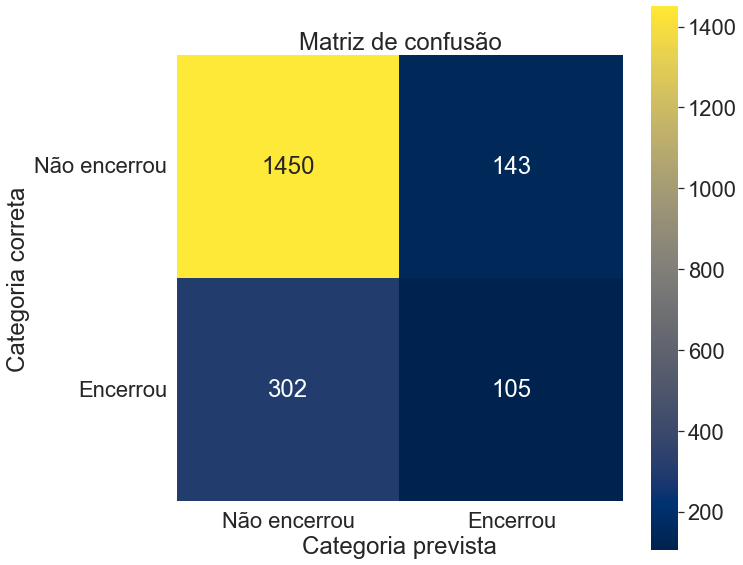

In [67]:
categories = ['Não encerrou','Encerrou']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_test,df_prep_ypred_test),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

sns.set_theme(style='white',font_scale=2)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Matriz de confusão")
ax.set_xlabel("Categoria prevista")
ax.set_ylabel("Categoria correta")
plt.show()

In [68]:
scaler = StandardScaler()
pca = PCA(0.75)
model = XGBClassifier(use_label_encoder=False,random_state=12345)

steps=[('scaler',scaler),('pca',pca),('model',model)]
pipe = Pipeline(steps=steps)

In [69]:
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_test = pipe.predict(df_prep_X_test)

print('Acurácia: %f'% accuracy_score(df_prep_y_test,df_prep_ypred_test))
print('F1-score: %f'% f1_score(df_prep_y_test,df_prep_ypred_test))
print('F2-score: %f'% fbeta_score(df_prep_y_test,df_prep_ypred_test,beta=2))

[16:00:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 0.808500
F1-score: 0.331588
F2-score: 0.264771


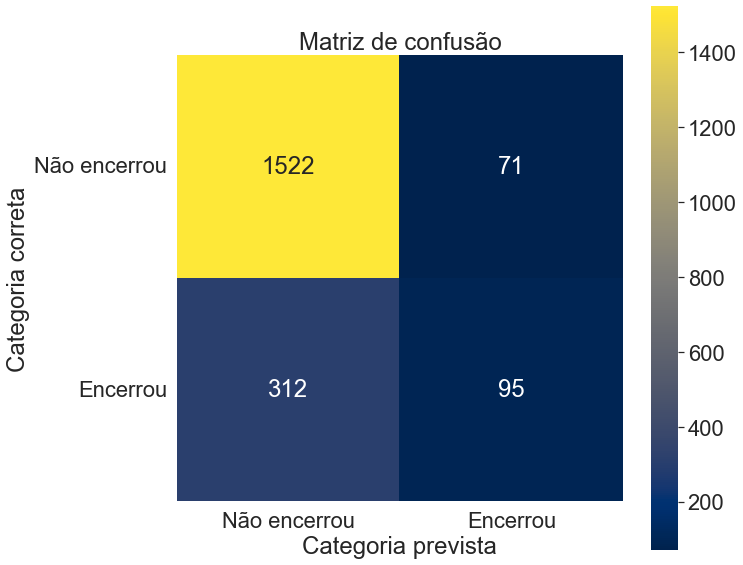

In [70]:
categories = ['Não encerrou','Encerrou']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_test,df_prep_ypred_test),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

sns.set_theme(style='white',font_scale=2)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Matriz de confusão")
ax.set_xlabel("Categoria prevista")
ax.set_ylabel("Categoria correta")
plt.show()

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.